# Workshop 8. Backward Propagation
## 1. Review of forward propagation

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = np.array([0.3,0.7]).reshape(1,-1)
weight_1 = np.array([[0.5,0.2,0.4],[-0.3,-0.3,0.6]])
weight_2 = np.array([0.5,-0.6,0.8]).reshape(-1,1)
z1 = data@weight_1
h = 1/(1+np.exp(-z1))

z2 = h@weight_2
output = 1/(1+np.exp(-z2))
output

array([[0.61548081]])

## 2. Backward Propagation
### 2.1 Perceptron
Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks. Perceptron is a linear classifier (binary)

#### Loss function
$$
\begin{aligned}
&J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$

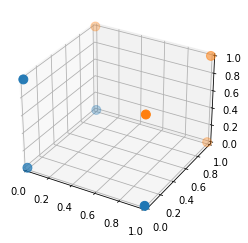

In [22]:
data = np.array([[1,0,0,0],#0
                 [1,0,0,1],#0
                 [1,1,0,0],#0
                 [1,0,1,0],#0
                 [1,1,1,0],#1
                 [1,0,1,1],#1
                 [1,1,0,1],#1
                 [1,1,1,1]])#1

y = np.array([0,0,0,0,1,1,1,1])

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.scatter(data[:4,1],data[:4,2],data[:4,3],s=80)
ax.scatter(data[4:,1],data[4:,2],data[4:,3],s=80)

#### 2.1.1 Without activation function

In [23]:
theta = np.array([2.0,2.0,1.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.001

for epoch in range(20000):
    z = data@theta
    theta-=alpha*(((1-y)/(1-z)-y/z))@data
    
z = data@theta
z

array([14.79028503, 21.05712478, 21.79708147, 21.05712478, 28.06392122,
       27.32396453, 28.06392122, 34.33076097])

#### 2.1.2 Sigmoid activation function:
$$
f(z)=\frac{1}{1+e^{-z}}
$$

$$
f(z)'= f(z)(1-f(z))
$$

In [24]:
theta = np.array([1.0,2.0,2.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.005

for epoch in range(6000):
    z = data@theta
    a = 1/(1+np.exp(-z))
    j = a*(1-a)
    theta-=alpha*(((1-y)/(1-a)-y/a)*j)@data
    
z = data@theta
a = 1/(1+np.exp(-z))
a

array([0.0015736 , 0.11473618, 0.11475776, 0.11475776, 0.91425539,
       0.91423874, 0.91423874, 0.99886081])

#### 2.1.3 Tanh activation function:
$$
f(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
$$

$$
f(z)'= 1-f(z)^2
$$

In [25]:
theta = np.array([1.0,2.0,1.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.01

for epoch in range(5000):
    z = data@theta
    a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    j=1-a**2
    theta-=alpha*(((1-y)/(1-a)-y/a)*j)@data
    
z = data@theta
a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
a

array([-0.99999371, -0.95990077, -0.95990077, -0.95990077,  0.98508491,
        0.98508491,  0.98508491,  0.99999769])

In [26]:
test_data = np.array([1,0.2,0.1,0.05])
z = test_data@theta
a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
a

-0.9998640781861056

### 2.2 Neural Network

#### Error of output layer
\begin{equation}
\delta^{(2)} = a^{(2)} - y
\end{equation}

#### Error of hidden layer
\begin{equation}
\delta^{(1)} = (W^{(2)})^T \cdot \delta^{(2)} \odot g'(a^{(1)})
\end{equation}

#### Gradient Descent Update

\begin{equation}
W^{(1)} = W^{(1)} - \alpha \frac{1}{m} \delta^{(1)}X^T
\end{equation}

\begin{equation}
W^{(2)} = W^{(2)} - \alpha \frac{1}{m} \delta^{(2)}(a^{(1)})^T
\end{equation}

In [27]:
data_2D = np.array([[1,0,0],#0
                    [1,1,0],#1
                    [1,0,1],#1
                    [1,1,1]])#0

In [28]:
theta_1 = np.array([[1.0,0.0],
                    [1.0,0.0],
                    [1.0,0.0]])
theta_2 = np.array([[1.0],
                    [0.0]])
y = np.array([0,1,1,0]).reshape(-1,1)
alpha = 0.05

for epoch in range(90000):
    z_1 = data_2D@theta_1
    h_1 = 1/(1+np.exp(-z_1))
    z_2 = h_1@theta_2
    h_2 = 1/(1+np.exp(-z_2))
    
    theta_2-=alpha*h_1.T@(h_2-y)
    theta_1-=alpha*data_2D.T@(((h_2-y)@theta_2.T)*h_1*(1-h_1))
    
    
z_1 = data_2D@theta_1
h_1 = 1/(1+np.exp(-z_1))
z_2 = h_1@theta_2
h_2 = 1/(1+np.exp(-z_2))

h_2

array([[0.00405776],
       [0.99782612],
       [0.99782612],
       [0.00343751]])